In [1]:
import gym

import torch
import torch.autograd as autograd 

from dqn_utils import epsilon_greedy, plot
from dqn_training import gamma_train

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/aravindkotikelapudi/opt/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

print("Print CUDA:  ", USE_CUDA)
print("Device   :", device)
if USE_CUDA:
  print("Device name  ", torch.cuda.get_device_name(0))

Print CUDA:   False
Device   : cpu


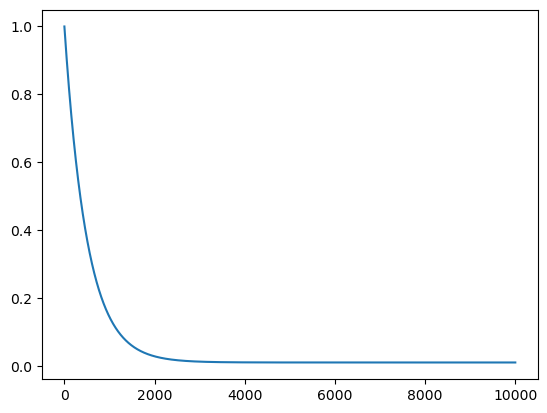

In [3]:
epsilon_greedy().plot()

In [4]:
env_id = "CartPole-v0"
env = gym.make(env_id)

In [5]:
gamma_train_instantiate = gamma_train(environment=env, Variable=Variable, USE_CUDA=USE_CUDA, device=device)

In [6]:
from torch.utils.tensorboard import SummaryWriter
dir = 'tests'
writer = SummaryWriter(log_dir=dir + '/gamma_train')

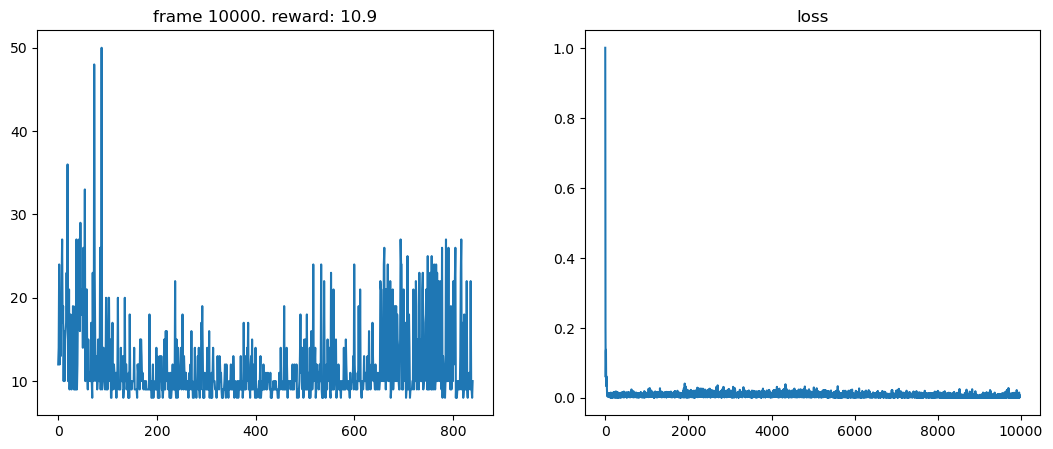

In [7]:
gamma_train_instantiate.training_loop(num_frames = 10000, batch_size=32, tensorboard=True, writer=writer)

In [8]:
print(gamma_train_instantiate.gamma)

Parameter containing:
tensor([0.0151], requires_grad=True)


Possible reasons for why training gamma might not work
- Gamma would be a tensor, so maybe the loss function is messed up since gamma should be an integer when multiplying it to the estimated Q value
- When defining gamma as a parameter in my model, it is not included in the forward pass which can be an issue. Even though in training code, I optimized all the parameters. Backprop might not work if there is no forward propagation